# Model validation currents

Note: this notebook requires the model output data

<div class="alert alert-warning" role="alert">
  <strong>⚠️ Important Disclaimer</strong><br><br>
  This model setup is a <strong>simplified version</strong> of a detailed model developed by DHI. It does <strong>not</strong> resolve fine-scale processes and is <strong>not calibrated</strong> for operational use. Use is limited to <strong>educational and research purposes only</strong> — results should <strong>not</strong> inform decision-making. Performance shown here does <strong>not</strong> represent that of DHI’s high-resolution models.
</div>

In [1]:
import modelskill as ms
import matplotlib.pyplot as plt
import helper as h

In [2]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"    
# mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
mr_fn = f"{mr_fldr}Area.dfsu"

In [3]:
# Load observation data
ulist, vlist = h.get_u_v_point_obs()

In [4]:
# Load MIKE21 simulation data
mr_u = ms.DfsuModelResult(mr_fn, name="MIKE21", item=1)
mr_v = ms.DfsuModelResult(mr_fn, name="MIKE21", item=2)
mr_u

<DfsuModelResult>: MIKE21
Time: 2022-01-01 00:00:00 - 2023-12-31 23:00:00
Quantity: u velocity component [m/s]

In [5]:
# u velocities
cmps = []
for o in ulist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_u))
    except Exception as e:
        print(e)
cc_u = ms.ComparerCollection(cmps)

In [6]:
# v velocities
cmps = []
for o in vlist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_v))
    except Exception as e:
        print(e)
cc_v = ms.ComparerCollection(cmps)

## Skill tables

In [7]:
# Print statistics for the u-component
cc_u.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
MO_NN,82544,-0.011,0.104,0.104,0.083,0.966,0.330,0.913
IJmondstroompaal2,98887,0.033,0.106,0.101,0.078,0.794,0.796,0.517


In [8]:
# Print statistics for the v-component
cc_v.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
MO_NN,82544,-0.030,0.083,0.077,0.067,0.491,0.994,0.113
IJmondstroompaal2,98887,-0.029,0.338,0.337,0.295,0.869,0.740,0.572


## Scatter plots

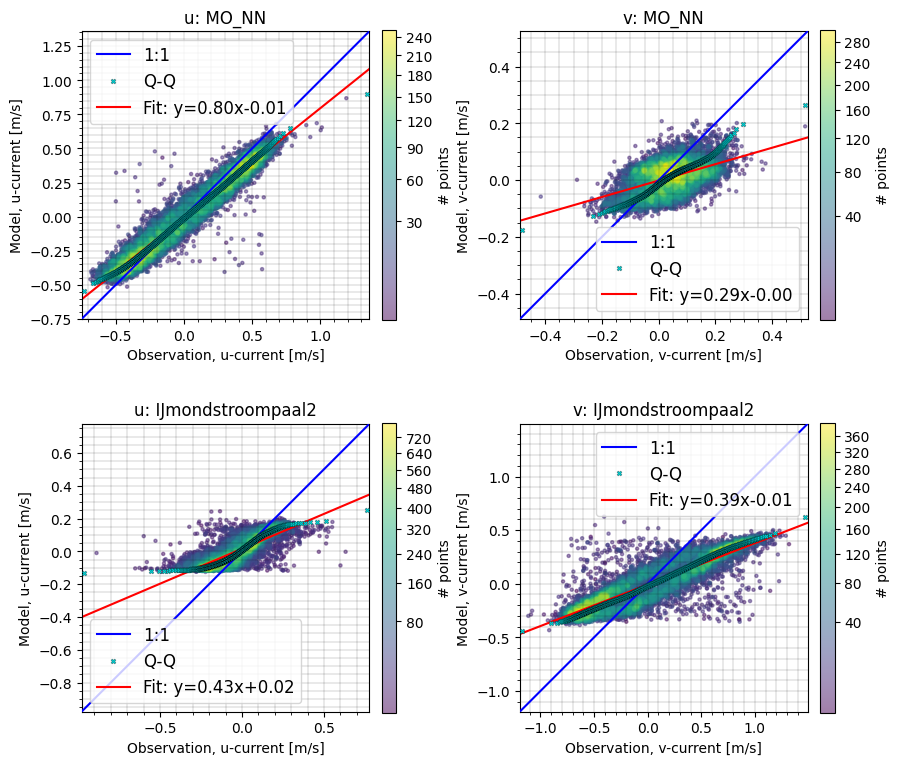

In [9]:
n_points = 10000
fig, axs = plt.subplots(len(cc_u), 2, figsize=(9,4*len(cc_u)))
axs = axs.flatten()
for i in range(len(cc_u)):
    cc_u[i].sel().plot.scatter(ax=axs[i*2], title=f"u: {cc_u[i].name}", show_points=n_points)
    cc_v[i].sel().plot.scatter(ax=axs[i*2+1], title=f"v: {cc_v[i].name}", show_points=n_points)
plt.tight_layout()
plt.show()

# OBS: See disclaimer below plots

<div class="alert alert-warning" role="alert">
  <strong>⚠️ Important Disclaimer</strong><br><br>
  This model setup is a <strong>simplified version</strong> of a detailed model developed by DHI. It does <strong>not</strong> resolve fine-scale processes and is <strong>not calibrated</strong> for operational use. Use is limited to <strong>educational and research purposes only</strong> — results should <strong>not</strong> inform decision-making. Performance shown here does <strong>not</strong> represent that of DHI’s high-resolution models.
</div>

## Timeseries

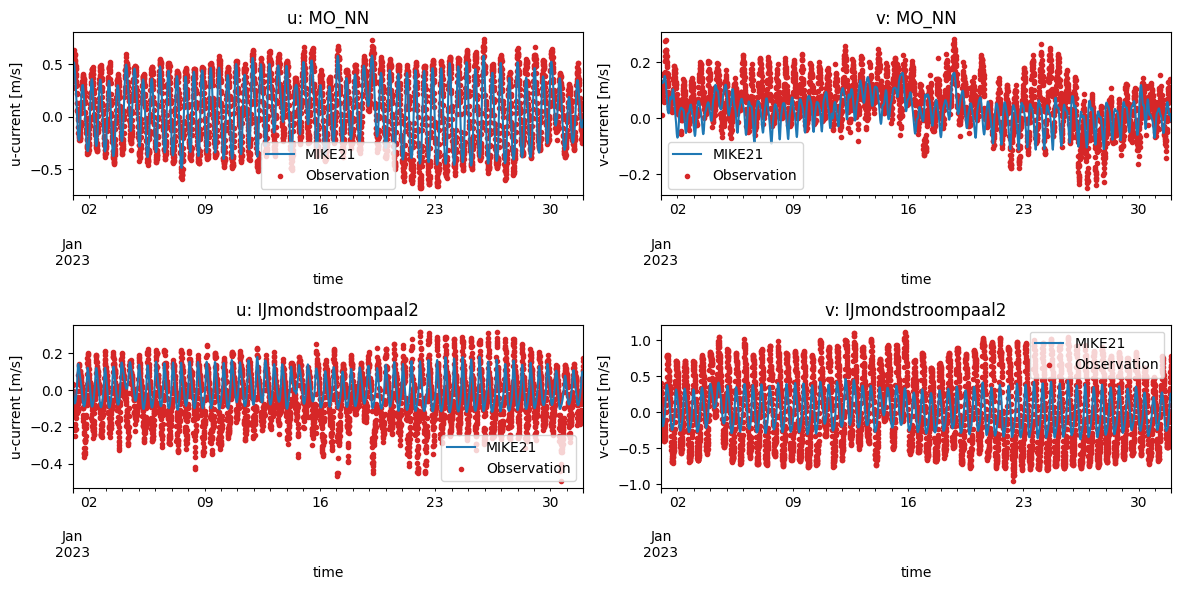

In [10]:
time_slice = slice("2023-01","2023-01")
fig, axs = plt.subplots(len(cc_u), 2, figsize=(12,3*len(cc_u)))
axs = axs.flatten()
for i in range(len(cc_u)):
    cc_u[i].sel(time=time_slice).plot.timeseries(ax=axs[i*2], title=f"u: {cc_u[i].name}")
    cc_v[i].sel(time=time_slice).plot.timeseries(ax=axs[i*2+1], title=f"v: {cc_v[i].name}")
plt.tight_layout()
plt.show()